# Median of Means (MoM) estimator 

We have a sample $X_1,...,X_n$ where $n=km$, and $k,m$ are some positive integers. The MoM estimator of $\mu = \mathbb{E}X$ is defined as

$$\hat{\mu} = \text{median}\left(\frac{1}{k}\sum_{i=1}^kX_i,\frac{1}{k}\sum_{i=k+1}^{2k}X_i,...,\frac{1}{k}\sum_{i=k(m-1)+1}^{n}X_i\right).$$

First we'll inspect the performance of this estimator with simulations. After that, we'll load the ENIGH 2018 data set and inspect the performance on wage data. 

In [1]:
import numpy as np 
from scipy.stats import t
import matplotlib.pyplot as plt
import pandas as pd
from robust_estimation.MoM import MoM
np.random.seed(0)

In [2]:
k = 50 #number of groups
m = np.arange(5,500,2) #number of members per group
ns = k*m #sample size
x_bar = []
mom = []
for n in ns: 
    x = t.rvs(df=1.5, size=n)
    x_bar.append(x.mean())
    mom.append(MoM(x,k))

[]

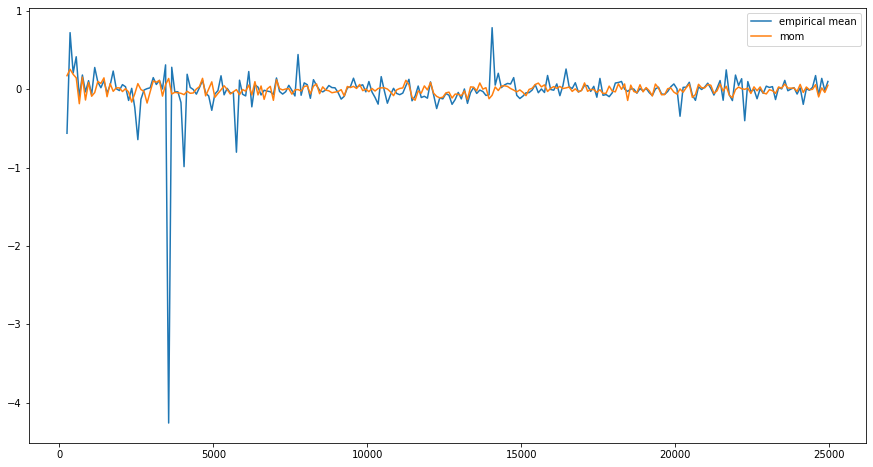

In [3]:
plt.figure(figsize=[15,8])
plt.plot(ns,x_bar,label='empirical mean')
plt.plot(ns,mom,label='mom')
plt.legend()
plt.plot()

In [4]:
data = pd.read_csv('ENIGH.csv')

In [5]:
sueldos = data['sueldos']
empirical = sueldos.mean()
mom = MoM(sueldos,17)
median = np.median(sueldos)
print('Empirical: {}, MoM: {}, Median: {}'.format(round(empirical,2),round(mom,2),round(median,2)))

Empirical: 22095.31, MoM: 22028.46, Median: 15513.81


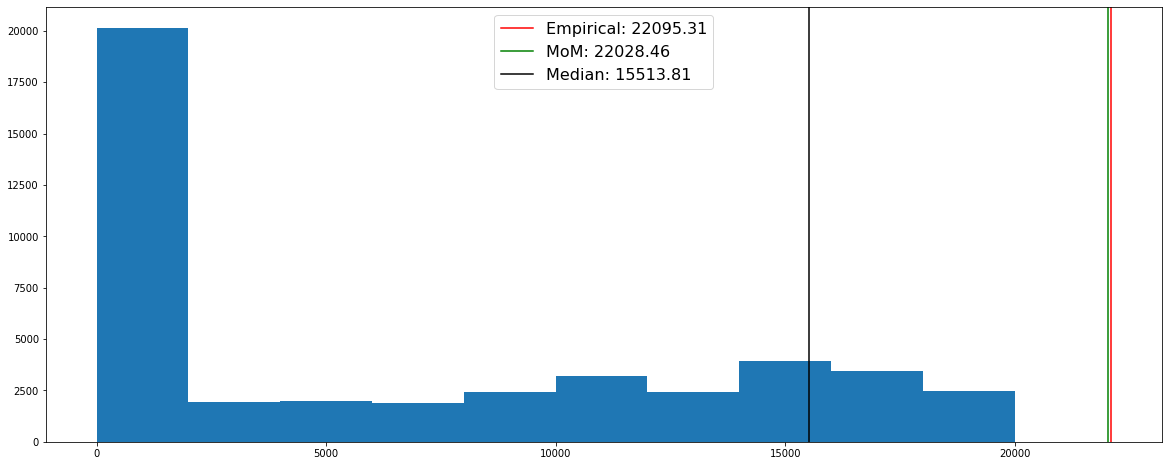

In [6]:
sueldos2 = sueldos[sueldos<=20000]
plt.figure(figsize=[20,8])
plt.hist(sueldos2)
plt.axvline(x=empirical,color='red',label='Empirical: {}'.format(round(empirical,2)))
plt.axvline(x=mom,color='green',label='MoM: {}'.format(round(mom,2)))
plt.axvline(x=median,color='black',label='Median: {}'.format(round(median,2)))
plt.legend(fontsize=16)
plt.show()